# visualizing the heatmap of the creation model cloud survey
Tim Tyree<br>
11.16.2024

In [1]:
import sys
import pathlib
import os

from lib.my_initialization import *
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

# define module

In [2]:
1_1

11

# dev

In [3]:
#TODO: figure out reading of one result (please let it be valid!)
#TODO: print it and extract relevant information
#TODO: scale it up and create a single data frame with all the results
#TODO: OR average each pixel before/after doing ^that
#TODO: plot each pixelc

In [4]:
# input_folder = f"{nb_dir}/data/osg_output/run_42"
# cluster = '15552477'
input_folder = f"{nb_dir}/data/osg_output/run_43"
cluster = '16923356'
os.path.exists(input_folder)

True

In [5]:
max_num_trials = 1089600  
# max_num_trials = 1001197  # 5 min 11 seconds
# # max_num_trials = 5*1001197
# max_num_trials = 50*1001197
# # num_num_trials = 100000 #works for the upper few rows only
num_num_trials = max_num_trials
# index=0
# index=103
trgti='Printing Inputs:'
trgto='Printing Outputs:'
dicts_lst = []
for index in range(num_num_trials):
    # fn = f"job.log.15552477.1001197"
    # fn = f"job.out.15552477.1001197"
    fn = f"job.out.{cluster}.{index}"
    # fn = f"job.log.15552477.{index}"
    directory = os.path.join(input_folder,fn)
    if os.path.exists(directory):
        with open(directory) as f:
            lines = np.array(f.readlines())
        #find io in file
        if len(lines)>2:
            ii = -9999
            io = -9999
            for i,line in enumerate(lines):
    #             print(line)
                if line.find(trgti) != -1:
                    ii=i
                if line.find(trgto) != -1:
                    io=i
            #extract
            sdict = 'dict('+''.join([x.replace('\n',',') for x in lines[ii+1:io-1]])
            sdict+=lines[io+1].replace('\n',',')
            sdict+=')'
            dicts = eval(sdict)
            #record
            dicts_lst.append(dicts)
len(dicts_lst)
df = pd.DataFrame(dicts_lst); del dicts_lst
df.shape

(1088740, 16)

In [6]:
beep(3)

-n 
-n 
-n 


0

In [7]:
# for i,line in enumerate(lines):
#     print(line)

In [8]:
# path = input_folder
# pl = pathlib.Path(path).iterdir()
# # oslb = os.listdir(path)
# print(type(pl))
# # print (type(oslb))

# print ('pathlib.iter: %s' % sys.getsizeof(pl))
# # print ('os.listdir: %s' % sys.getsizeof(oslb))

In [9]:
a_fk = 1.552
b_fk = 3.01

In [10]:
df['a'] = df['varkappa'].round(3)
df['b'] = (df['a']*(df['chi']-1)).round(3)
#Q: is ^this right??
#A: yes.

In [11]:
df['log10b'] = np.log10(df['b']).round(5)

In [12]:
a_values = df['a'].round(3).drop_duplicates().sort_values().values
# b_values = df['b'].round(3).drop_duplicates().sort_values().values
b_values = df['log10b'].round(5).drop_duplicates().sort_values().values
DA = np.median(np.diff(a_values))
DB = np.median(np.diff(b_values))
DA,DB
# a_values,b_values

(0.20000000000000018, 0.013390000000000013)

In [13]:
# df_mean = df.groupby(by=['a','b'])['TermTime'].mean()
df_mean = df.groupby(by=['a','log10b'])['TermTime'].mean()

In [14]:
# df_descr = df.groupby(by=['a','b'])['TermTime'].describe()
df_descr = df.groupby(by=['a','log10b'])['TermTime'].describe()

In [15]:
# np.array(df_descr.index.values)
a_values = df_descr.reset_index()['a'].drop_duplicates().values
# b_values = df_descr.reset_index()['b'].drop_duplicates().values
log10b_values = df_descr.reset_index()['log10b'].drop_duplicates().values

In [16]:
# log10b_values = np.around(np.log10(b_values),5)
logb_step = np.median(np.diff(log10b_values))
logb_min = np.min(log10b_values)
logb_max = np.max(log10b_values)
logb_min,logb_max,logb_step

(0.0, 3.0, 0.013390000000000013)

In [17]:
# np.mgrid?

In [18]:
x, y = np.mgrid[slice(1,10.05,0.2),
                slice(logb_min,logb_max,logb_step)]
# x, y = np.mgrid[slice(1,10.05,0.1),
#                 slice(1,15.05,0.1)]
# y, x = np.mgrid[slice(-4, 4 + dy, dy),
#                 slice(-4, 4 + dx, dx)]
# z = (1 - x / 3. + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = x*y
# z = z[:-1, :-1]
z*=0
z-=9999.
# x[0].shape,y[:,0].shape
d = df_descr['mean']
# atol = 1e2
atol=1e-3
# atol=1e-4
# atol=1e-5
## atol = 13.5
## tol = 1e2
# for i,a in enumerate(x[0]):
#     ia = np.argwhere(np.isclose(a_values,a,atol=atol))    
# #     ia = np.argwhere(np.isclose(a_values,a,rtol=tol))    
#     for j,b in enumerate(y[:,0]):
for i,a in enumerate(x[:,0]):
    ia = np.argwhere(np.isclose(a_values,a,atol=atol))    
    for j,b in enumerate(y[0]):
# for i,a in enumerate(x[0]):
#     for j,b in enumerate(y[:,0]):
        ib = np.argwhere(np.isclose(log10b_values,b,atol=atol))
#         ib = np.argwhere(np.isclose(b_values,b,atol=atol))
#         ib = np.argwhere(np.isclose(b_values,b,rtol=tol))
        try:
            if (ia.shape[0]>0) and (ib.shape[0]>0):
                val = d.loc[a_values[ia[0,0]],log10b_values[ib[0,0]]]
#                 val = d.loc[a_values[ia[0,0]],b_values[ib[0,0]]]
                z[i-1,j-1] = val
#                 print(f"index found! at {i=},{j=}")
        except KeyError as e:
#             print(f"asdf")
            pass
# for (a,b),row in df_descr.iterrows():
#     val = row['mean']
#     #record
#     z_lst.append(val)
#     a_set.update(set([a]))
# # df_mean
# nrows = len(a_set)

In [19]:
ia.shape,ib.shape

((1, 1), (1, 1))

In [20]:
val

0.3144952000000012

In [21]:
z

array([[19.1116    , 21.1976344 , 19.3274241 , ..., 12.8583991 ,
        13.1739611 , 16.4769465 ],
       [10.0584656 , 10.6381316 , 12.3663595 , ...,  9.3502661 ,
        10.4007777 , 10.3500684 ],
       [ 6.7918578 ,  7.13121576,  7.1343392 , ...,  7.2917802 ,
         8.354706  ,  7.5301019 ],
       ...,
       [ 0.2301558 ,  0.2370597 ,  0.244833  , ...,  0.3188044 ,
         0.3399703 ,  0.2425068 ],
       [ 0.2318927 ,  0.244313  ,  0.2395959 , ...,  0.314492  ,
         0.3144952 ,  0.2256459 ],
       [31.5932806 , 35.633971  , 33.7384341 , ..., 21.1394884 ,
        18.5488338 , 33.0777314 ]])

In [22]:
d
# # val
# # d.loc[ia[0],ib[0]]
# # ia[0],ib[0]
# # val
# # d
# ia = np.argwhere(np.isclose(a_values,a,atol=1e-5))    
# ia,ib,a,b

a     log10b 
1.0   0.00000    33.077731
      0.01326    31.593281
      0.02694    35.633971
      0.04021    33.738434
      0.05346    35.212301
                   ...    
10.0  2.94643     0.372083
      2.95982     0.309855
      2.97321     0.340422
      2.98661     0.314492
      3.00000     0.314495
Name: mean, Length: 10896, dtype: float64

In [23]:
b_values
# # d.loc[a].loc[b]
# b
# a
# a,b
# np.isclose(b_values,b,atol=atol)
# np.argwhere(np.isclose(b_values,b,atol=atol))
np.isclose(log10b_values,b,atol=atol)
np.argwhere(np.isclose(log10b_values,b,atol=atol))

array([[226]])

In [24]:
# z = np.array(z_lst).reshape(-1,nrows)
# z.shape

In [25]:
# b_values

In [26]:
# df['a']*(df['chi'] - 1)

In [27]:
# dx, dy = 0.015, 0.05
# xcol = 'a'
# ycol = 'b'
# # a_values = np.arange(1,10.05,0.1)
# # b_values = np.arange(1,15.05,0.1)
# # x, y = np.mgrid[iter(sorted(a_values)),
# #                 iter(sorted(b_values))]
# x, y = np.mgrid[slice(1,10.05,0.1),
#                 slice(1,15.05,0.1)]
# # y, x = np.mgrid[slice(-4, 4 + dy, dy),
# #                 slice(-4, 4 + dx, dx)]
# z = (1 - x / 3. + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# z = z[:-1, :-1]
# z*=0
# z-=9999.
# ncols,nrows = x.shape
# ncols,nrows,z.shape

# zcol='TermTime'
# # n_digits_round=7
# n_digits_round=15
# # atol = 1e-08
# # atol = 1e-04
# # atol = 1e-2
# # atol = 1e-1#different but smaller
# atol = 1e-0 #different
# # atol=1e1
# min_num_obs = 1
# boona = ~np.isnan(df[zcol].values)
# for i in range(ncols-1):
#     for j in range(nrows-1):
#         pass
#         #compute the mean of the four corners
# #         boo = np.isclose(df[xcol],x[i,j],atol=n_digits_round) & np.isclose(df[ycol],y[i,j],atol=n_digits_round) & boona
# #         boo = np.isclose(df[xcol],x[i,j],atol=atol) & np.isclose(df[ycol],y[i,j],atol=atol) & boona
#         boo = np.isclose(df[xcol],x[i,j]) & np.isclose(df[ycol],y[i,j]) & boona
#         if sum(boo)>=min_num_obs:
#             zvalue = df[boo][zcol].mean()
#             #TODO: record to z[i,j] the mean of the means
#             z[i,j] = zvalue # i*j

In [28]:
# beep(3)

In [29]:
# assert sum(boona)/boona.shape[0]==1
# #^that says there is no nan value

In [30]:
from lib.lib_care.measure._find_contours import find_contours

In [31]:
# find_contours?

In [32]:
# clotting_time = 40 #s
clotting_time = 10 #s
contours = find_contours(z, level = clotting_time, mode = 'hard_boundary')
# for c in contours:
#     pass
# c
imax = -9999
max_len = 0
for i,c in enumerate(contours):
    l = c.shape[0]
    if l>max_len:
        max_len = l
        imax = i
max_len,imax

(285, 0)

In [33]:
# beep(3)

In [34]:
# df[zcol].describe()

In [35]:
# df[zcol].mean()

In [36]:
# # df[boo][zcol].hist()
# df[boo][zcol].shape

In [37]:
# np.isclose?

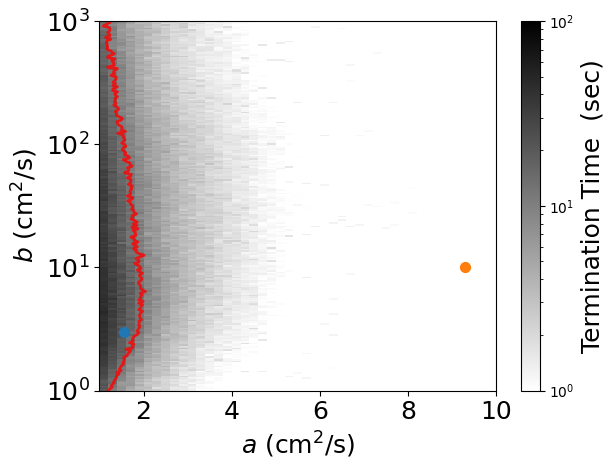

In [38]:
fontsize=18
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()
# z_min, z_max = 1e-9, z.max()
# z_min, z_max = 1e-3, z.max()
# z_min, z_max = 1e-1, z.max()
# z_min, z_max = 1e-1, 100
z_min, z_max = 1, 100
# z_min, z_max = 1e1, z.max()
# z_min, z_max = 1e-9, 1e-5
# c = plt.pcolormesh(x, y, z, cmap ='gray_r')#, cmap='viridis')
c = plt.pcolormesh(x, y, z, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
cbar = plt.colorbar(c)
cbar.set_label('Termination Time  (sec)',fontsize=fontsize)
# cbar.set_ticklabels(fontsize=fontsize)

#plot contours
ixv = np.arange(x[:,0].shape[0])
iyv = np.arange(y[0,:].shape[0])
# for c in contours:
c  = contours[imax]
xv = np.interp(x=c[:,0], xp=ixv, fp=x[:,0])
yv = np.interp(x=c[:,1], xp=iyv, fp=y[0,:])
plt.plot(xv,yv,color='r',lw=2,alpha=0.8)

#plot points of full models
afull = [1.552,9.3]
lbfull = np.log10([3.01,10.0])
cfull = ['C0','C1']
plt.scatter(x=[afull[0]],y=[lbfull[0]],c=[cfull[0]],zorder=10,s=50)
plt.scatter(x=[afull[1]],y=[lbfull[1]],c=[cfull[1]],zorder=10,s=50)

format_plot(xlabel=r'$a$ (cm$^2/$s)', ylabel=r'$b$ (cm$^2/$s)',fontsize=fontsize)
# plt.ylim([7.8,15])
# plt.title('matplotlib.pyplot.pcolormesh() function Example', fontweight ="bold")
plt.yticks(range(4))
plt.gca().set_yticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
plt.show()

In [39]:
# TODO: increase fontsize of cbar tick labels
# DONE: draw a red level set for a constant threshold
# DONE: place one scatter plot point for FK in blue
# DONE: place one scatter plot point for LR in orange
# TODO(bonus): make a line plot with a blue,orange line for increasing b at constant a_full

In [40]:
# #plot contours
# ixv = np.arange(x[:,0].shape[0])
# iyv = np.arange(y[0,:].shape[0])
# # for c in contours:
# c  = contours[0]
# xv = np.interp(x=c[:,0], xp=ixv, fp=x[:,0])
# yv = np.interp(x=c[:,1], xp=iyv, fp=y[0,:])
# plt.plot(xv,yv,color='r',lw=2,alpha=0.8)

In [41]:
# len(contours)

In [42]:
# a_values = np.arange(1,10.05,0.1)
# b_values = np.arange(1,15.05,0.1)
# xx, yy = np.meshgrid(a_values, b_values, sparse=True)
# z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

In [43]:
# plt.imshow(z)

In [44]:
# for (a,b),ts in df[['a','b','TermTime']].groupby(by=['a','b']):
#     pass

In [45]:
# tsv = ts['TermTime'].values
# plt.hist(tsv,bins=np.arange(0,1,0.05))
# plt.show()

In [46]:
# a,b

In [47]:
#heretim (bonus mode)
#DONE: condense table to minimal a,b,TermTime table
#DONE(trivially): generate spline estimate of mean value of surface in given (a,b) space
#DONEDONE: visualize ibid
#TODO: polish it, and scale it up as much as possible
#TODO: put it in a nice LaTeX document and share it with wouter via Overleaf

In [48]:
beep(3)

-n 
-n 
-n 


0

In [49]:
# fn_lst = os.listdir(input_folder)
# len(fn_lst)

In [50]:
# for fn in os.listdir(input_folder):
#     pass

In [51]:
# fn

# make a smoothed version of the phase diagram

In [52]:
#input: z
#output: z_smooothed as zs 

In [53]:
@njit
def __blur_at_pixel(inVfs,x,y):
	'''coefficients returned by GaussianMatrix[1] // MatrixForm'''
	outV  = 0.00987648 * inVfs[x-1,y+1] + 0.0796275 * inVfs[  x,y+1] + 0.00987648 * inVfs[ x +1, y + 1]
	outV += 0.0796275  * inVfs[x  ,y  ] + 0.641984 *  inVfs[  x,  y] + 0.0796275  * inVfs[ x +1, y    ]
	outV += 0.00987648 * inVfs[x-1,y-1] + 0.0796275 * inVfs[  x,y-1] + 0.00987648 * inVfs[ x +1, y - 1]
	return outV

In [54]:
zs = z.copy()
ncol,nrow = z.shape
for i in range(2,ncol-2):
    for j in range(2,nrow-2):
        zs[i,j] = __blur_at_pixel(z,i,j)

niter = 7
for k in range(niter):
    zs2 = zs.copy()
    for i in range(2,ncol-2):
        for j in range(2,nrow-2):
            zs2[i,j] = __blur_at_pixel(zs,i,j)
    zs = zs2.copy()
    for i in range(2,ncol-2):
        for j in range(2,nrow-2):
            zs[i,j] = __blur_at_pixel(zs2,i,j)


In [55]:
#TODO: figure out simple blurring

In [56]:
# clotting_time = 40 #s
clotting_time = 10 #s
contours = find_contours(zs, level = clotting_time, mode = 'hard_boundary')
# for c in contours:
#     pass
# c
imax = -9999
max_len = 0
for i,c in enumerate(contours):
    l = c.shape[0]
    if l>max_len:
        max_len = l
        imax = i
max_len,imax

(243, 0)

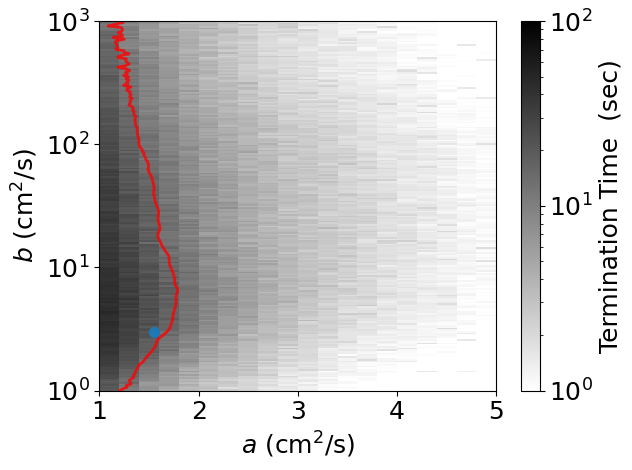

In [57]:
fontsize=18
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()
# z_min, z_max = 1e-9, z.max()
# z_min, z_max = 1e-3, z.max()
# z_min, z_max = 1e-1, z.max()
# z_min, z_max = 1e-1, 100
z_min, z_max = 1, 100
# z_min, z_max = 1, 60
# z_min, z_max = 1e1, z.max()
# z_min, z_max = 1e-9, 1e-5
# c = plt.pcolormesh(x, y, z, cmap ='gray_r')#, cmap='viridis')
c = plt.pcolormesh(x, y, z, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
# c = plt.pcolormesh(x, y, zs, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
cbar = plt.colorbar(c)
cbar.set_label('Termination Time  (sec)',fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize) 

#plot contours
ixv = np.arange(x[:,0].shape[0])
iyv = np.arange(y[0,:].shape[0])
# for c in contours:
c  = contours[imax]
xv = np.interp(x=c[:,0], xp=ixv, fp=x[:,0])
yv = np.interp(x=c[:,1], xp=iyv, fp=y[0,:])
plt.plot(xv,yv,color='r',lw=2,alpha=0.8)

#plot points of full models
afull = [1.552,9.3]
lbfull = np.log10([3.01,10.0])
cfull = ['C0','C1']
plt.scatter(x=[afull[0]],y=[lbfull[0]],c=[cfull[0]],zorder=10,s=50)
plt.scatter(x=[afull[1]],y=[lbfull[1]],c=[cfull[1]],zorder=10,s=50)

format_plot(xlabel=r'$a$ (cm$^2/$s)', ylabel=r'$b$ (cm$^2/$s)',fontsize=fontsize)
# plt.ylim([7.8,15])
# plt.title('matplotlib.pyplot.pcolormesh() function Example', fontweight ="bold")
plt.yticks(range(4))
plt.xlim([1,5])
# plt.ylim([1,10])
plt.gca().set_yticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
plt.show()

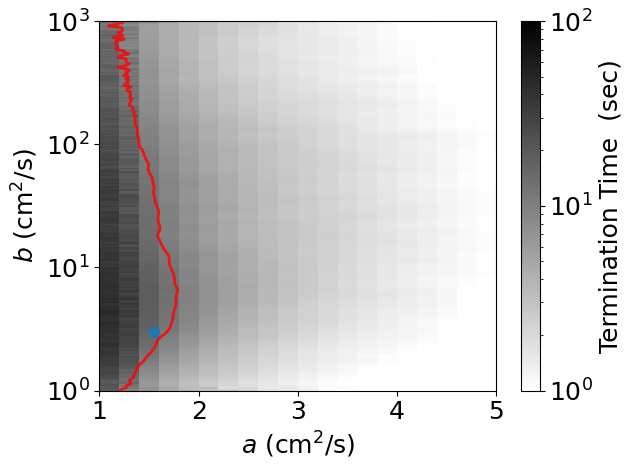

In [58]:
fontsize=18
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()
# z_min, z_max = 1e-9, z.max()
# z_min, z_max = 1e-3, z.max()
# z_min, z_max = 1e-1, z.max()
# z_min, z_max = 1e-1, 100
z_min, z_max = 1, 100
# z_min, z_max = 1, 60
# z_min, z_max = 1e1, z.max()
# z_min, z_max = 1e-9, 1e-5
# c = plt.pcolormesh(x, y, z, cmap ='gray_r')#, cmap='viridis')
# c = plt.pcolormesh(x, y, z, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
c = plt.pcolormesh(x, y, zs, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
cbar = plt.colorbar(c)
cbar.set_label('Termination Time  (sec)',fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize) 

#plot contours
ixv = np.arange(x[:,0].shape[0])
iyv = np.arange(y[0,:].shape[0])
# for c in contours:
c  = contours[imax]
xv = np.interp(x=c[:,0], xp=ixv, fp=x[:,0])
yv = np.interp(x=c[:,1], xp=iyv, fp=y[0,:])
plt.plot(xv,yv,color='r',lw=2,alpha=0.8)

#plot points of full models
afull = [1.552,9.3]
lbfull = np.log10([3.01,10.0])
cfull = ['C0','C1']
plt.scatter(x=[afull[0]],y=[lbfull[0]],c=[cfull[0]],zorder=10,s=50)
plt.scatter(x=[afull[1]],y=[lbfull[1]],c=[cfull[1]],zorder=10,s=50)

format_plot(xlabel=r'$a$ (cm$^2/$s)', ylabel=r'$b$ (cm$^2/$s)',fontsize=fontsize)
# plt.ylim([7.8,15])
# plt.title('matplotlib.pyplot.pcolormesh() function Example', fontweight ="bold")
plt.yticks(range(4))
plt.xlim([1,5])
plt.gca().set_yticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
# plt.ylim([1,10])
# plt.gca().set_ylim([1,10])
plt.show()

## now repeat on a linear yscale from 1 to 10

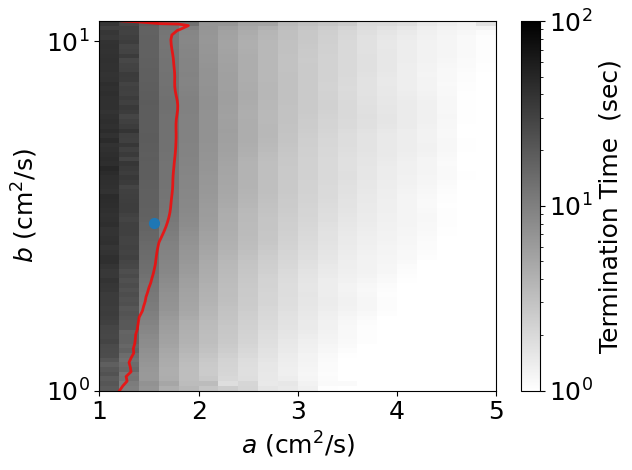

In [59]:
# log10b_values = np.around(np.log10(b_values),5)
logb_step = np.median(np.diff(log10b_values))
logb_min = np.min(log10b_values)
logb_max = 1+5*logb_step#np.max(log10b_values)
logb_min,logb_max,logb_step



x, y = np.mgrid[slice(1,10.05,0.2),
                slice(logb_min,logb_max,logb_step)]
# x, y = np.mgrid[slice(1,10.05,0.1),
#                 slice(1,15.05,0.1)]
# y, x = np.mgrid[slice(-4, 4 + dy, dy),
#                 slice(-4, 4 + dx, dx)]
# z = (1 - x / 3. + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = x*y
# z = z[:-1, :-1]
z*=0
z-=9999.
# x[0].shape,y[:,0].shape
d = df_descr['mean']
# atol = 1e2
atol=1e-3
# atol=1e-4
# atol=1e-5
## atol = 13.5
## tol = 1e2
# for i,a in enumerate(x[0]):
#     ia = np.argwhere(np.isclose(a_values,a,atol=atol))    
# #     ia = np.argwhere(np.isclose(a_values,a,rtol=tol))    
#     for j,b in enumerate(y[:,0]):
for i,a in enumerate(x[:,0]):
    ia = np.argwhere(np.isclose(a_values,a,atol=atol))    
    for j,b in enumerate(y[0]):
# for i,a in enumerate(x[0]):
#     for j,b in enumerate(y[:,0]):
        ib = np.argwhere(np.isclose(log10b_values,b,atol=atol))
#         ib = np.argwhere(np.isclose(b_values,b,atol=atol))
#         ib = np.argwhere(np.isclose(b_values,b,rtol=tol))
        try:
            if (ia.shape[0]>0) and (ib.shape[0]>0):
                val = d.loc[a_values[ia[0,0]],log10b_values[ib[0,0]]]
#                 val = d.loc[a_values[ia[0,0]],b_values[ib[0,0]]]
                z[i-1,j-1] = val
#                 print(f"index found! at {i=},{j=}")
        except KeyError as e:
#             print(f"asdf")
            pass
# for (a,b),row in df_descr.iterrows():
#     val = row['mean']
#     #record
#     z_lst.append(val)
#     a_set.update(set([a]))
# # df_mean
# nrows = len(a_set)

# clotting_time = 40 #s
clotting_time = 10 #s
contours = find_contours(z, level = clotting_time, mode = 'hard_boundary')
# for c in contours:
#     pass
# c
imax = -9999
max_len = 0
for i,c in enumerate(contours):
    l = c.shape[0]
    if l>max_len:
        max_len = l
        imax = i
max_len,imax

###########################################
zs = z.copy()
ncol,nrow = z.shape
for i in range(2,ncol-2):
    for j in range(2,nrow-2):
        zs[i,j] = __blur_at_pixel(z,i,j)

niter = 7
for k in range(niter):
    zs2 = zs.copy()
    for i in range(2,ncol-2):
        for j in range(2,nrow-2):
            zs2[i,j] = __blur_at_pixel(zs,i,j)
    zs = zs2.copy()
    for i in range(2,ncol-2):
        for j in range(2,nrow-2):
            zs[i,j] = __blur_at_pixel(zs2,i,j)

# clotting_time = 40 #s
clotting_time = 10 #s
contours = find_contours(zs, level = clotting_time, mode = 'hard_boundary')
# for c in contours:
#     pass
# c
imax = -9999
max_len = 0
for i,c in enumerate(contours):
    l = c.shape[0]
    if l>max_len:
        max_len = l
        imax = i
max_len,imax


fontsize=18
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()
# z_min, z_max = 1e-9, z.max()
# z_min, z_max = 1e-3, z.max()
# z_min, z_max = 1e-1, z.max()
# z_min, z_max = 1e-1, 100
z_min, z_max = 1, 100
# z_min, z_max = 1, 60
# z_min, z_max = 1e1, z.max()
# z_min, z_max = 1e-9, 1e-5
# c = plt.pcolormesh(x, y, z, cmap ='gray_r')#, cmap='viridis')
# c = plt.pcolormesh(x, y, z, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
c = plt.pcolormesh(x, y, zs, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
cbar = plt.colorbar(c)
cbar.set_label('Termination Time  (sec)',fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize) 

#plot contours
ixv = np.arange(x[:,0].shape[0])
iyv = np.arange(y[0,:].shape[0])
# for c in contours:
c  = contours[imax]
xv = np.interp(x=c[:,0], xp=ixv, fp=x[:,0])
yv = np.interp(x=c[:,1], xp=iyv, fp=y[0,:])
plt.plot(xv,yv,color='r',lw=2,alpha=0.8)

#plot points of full models
afull = [1.552,9.3]
lbfull = np.log10([3.01,10.0])
cfull = ['C0','C1']
plt.scatter(x=[afull[0]],y=[lbfull[0]],c=[cfull[0]],zorder=10,s=50)
plt.scatter(x=[afull[1]],y=[lbfull[1]],c=[cfull[1]],zorder=10,s=50)

format_plot(xlabel=r'$a$ (cm$^2/$s)', ylabel=r'$b$ (cm$^2/$s)',fontsize=fontsize)
# plt.ylim([7.8,15])
# plt.title('matplotlib.pyplot.pcolormesh() function Example', fontweight ="bold")
plt.yticks(range(2))
plt.xlim([1,5])
plt.gca().set_yticklabels([r"$10^0$",r"$10^1$"])
# plt.gca().set_yticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
# plt.ylim([1,10])
# plt.gca().set_ylim([1,10])
plt.show()

In [60]:
beep(1)

-n 


0

# dev line plot of mean termination time versus $b$ and $a$

In [62]:
# x_values,y_values = df[df['a']==a_fk].sort_values(by='b')[['b','TermTime']].values.T
dd = df[df['a']==a_fk].groupby(by='b')['TermTime'].mean()
dd2 = df[df['b']==b_fk].groupby(by='a')['TermTime'].mean()
x_values = dd.index.values
y_values = dd.values
x_values2 = dd2.index.values
y_values2 = dd2.values

In [63]:
# def moving_average(a, n=3):
#     ret = np.cumsum(a, dtype=float)
#     ret[n:] = ret[n:] - ret[:-n]
#     return ret[n - 1:] / n

In [88]:
navg = 15
# yavg_values = moving_average(y_values,n=navg)
# xavg_values = moving_average(x_values,n=navg)
# yavg_values2 = moving_average(y_values2,n=navg)
# xavg_values2 = moving_average(x_values2,n=navg)
# yavg_values
yavg_values2.shape

(48,)

In [89]:
yavg_values = savgol_filter(y_values, navg, polyorder=3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
xavg_values = savgol_filter(x_values, navg, polyorder=3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)

yavg_values2 = savgol_filter(y_values2, navg, polyorder=3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
xavg_values2 = savgol_filter(x_values2, navg, polyorder=3, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)

yavg_values2.shape

(48,)

In [90]:
# np.ma.mean?

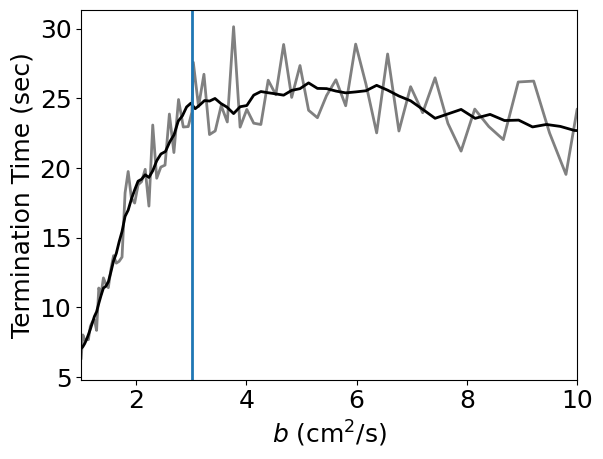

In [91]:
plt.plot(x_values,y_values,color='gray',lw=2)
plt.plot(xavg_values,yavg_values,color='k',lw=2)
ylim = plt.ylim()
plt.plot([b_fk,b_fk],ylim,color='C0',lw=2)
plt.ylim(ylim)
plt.xlim([1,10])
# format_plot
format_plot(fontsize=fontsize,xlabel=r'$b$ (cm$^2$/s)',ylabel='Termination Time (sec)')
# plt.xscale('log')
plt.show()

In [92]:
yb_fk = np.interp(b_fk, xavg_values, yavg_values)
ya_fk = np.interp(a_fk, xavg_values2, yavg_values2)
yb_fk,ya_fk

(24.56017023442315, 23.805708233199258)

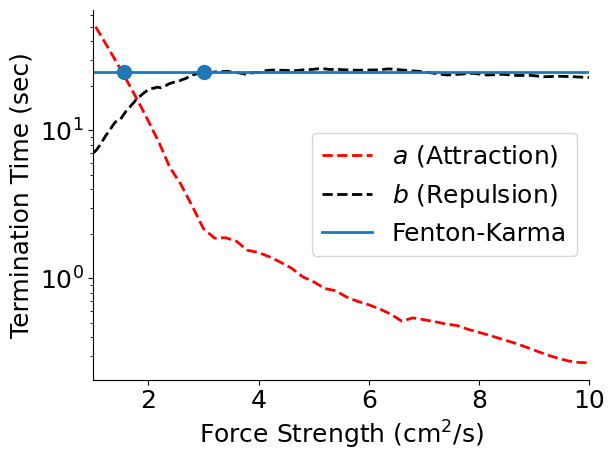

In [114]:
# plt.plot(x_values,y_values,color='gray',lw=2)
plt.plot(xavg_values2,yavg_values2,color='r',lw=2,label=r'$a$ (Attraction)',linestyle='--')
plt.plot(xavg_values,yavg_values,color='k',lw=2,label=r'$b$ (Repulsion)',linestyle='--')
# ylim = plt.ylim()
# plt.plot([b_fk,b_fk],ylim,color='C0',lw=2)
# plt.ylim(ylim)
xlim = [1,10]
plt.plot(xlim,[yb_fk,yb_fk],color='C0',lw=2, label='Fenton-Karma')
plt.xlim(xlim)
plt.scatter([b_fk],[yb_fk],color='C0',s=100,zorder=10)
# plt.scatter([a_fk],[ya_fk],color='C0',s=100,zorder=10)
plt.scatter([a_fk],[yb_fk],color='C0',s=100,zorder=10)

# format_plot
# format_plot(fontsize=fontsize,xlabel=r'$b$ (cm$^2$/s)',ylabel='Termination Time (sec)')
format_plot(fontsize=fontsize,xlabel=r'Force Strength (cm$^2$/s)',ylabel='Termination Time (sec)')
# plt.xscale('log')
plt.legend(fontsize=fontsize)#,fancybox=False)
ax = plt.gca()
# Set the top and right spines (borders) to white
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Ensure the axes background is transparent or a color that contrasts with white if needed
ax.set_facecolor('none') # Makes background transparent
ax.set_yscale('log')
plt.show()

In [97]:
beep(5)

-n 
-n 
-n 
-n 
-n 


0

In [71]:
a_fk,b_fk

(1.552, 3.01)

In [73]:
np.arange(1,10.05,0.2)

array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
        3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
        5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,
        7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,
        9.8, 10. ])